In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os
os.chdir('/content/drive/MyDrive/Summer22_ML Assignments/')

#Importing Dataset
dataset_SeoulBikedata = pd.read_csv('SeoulBikeData.csv', encoding = 'latin-1')
dataset_SeoulBikedata.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

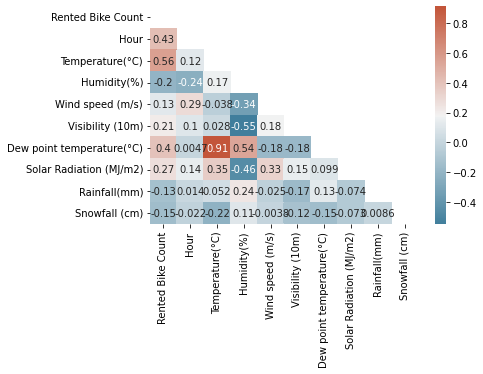

In [2]:
dataset_SeoulBikedata['Date'] = pd.to_datetime(dataset_SeoulBikedata['Date'], format="%d/%m/%Y")

dataset_SeoulBikedata = dataset_SeoulBikedata[dataset_SeoulBikedata['Functioning Day'] == 'Yes']
dataset_SeoulBikedata.reset_index(inplace = True)
dataset_SeoulBikedata.drop(columns = ['index','Functioning Day'],inplace = True)

dataset_SeoulBikedata['Day_or_night'] = (dataset_SeoulBikedata['Hour']).apply(lambda x: 'Night' if (x>19 or x<5)else ('Day'))
dataset_SeoulBikedata['Weekday'] = pd.DatetimeIndex(dataset_SeoulBikedata['Date']).day_name()

corrMatrix = dataset_SeoulBikedata.corr()
sn.heatmap(corrMatrix, annot=True, cmap = sn.diverging_palette(230, 20, as_cmap=True), mask = np.triu(np.ones_like(corrMatrix)))
sn.set(rc={'figure.figsize':(10,7.5)})

In [3]:
dataset_SeoulBikedata = dataset_SeoulBikedata.drop(columns = ['Dew point temperature(°C)'])

In [4]:
median_rented_bike_count = dataset_SeoulBikedata['Rented Bike Count'].median()
median_rented_bike_count

print('Number of rows with Rented bike count less than median value: ', 
      dataset_SeoulBikedata['Rented Bike Count'][dataset_SeoulBikedata['Rented Bike Count'] < median_rented_bike_count].count())
print('Number of rows with Rented bike count greater than median value: ', 
      dataset_SeoulBikedata['Rented Bike Count'][dataset_SeoulBikedata['Rented Bike Count'] > median_rented_bike_count].count())

Number of rows with Rented bike count less than median value:  4229
Number of rows with Rented bike count greater than median value:  4231


In [5]:
#Converting Target variable into binary based on median value
dataset_SeoulBikedata.loc[dataset_SeoulBikedata['Rented Bike Count'] < median_rented_bike_count, 'Rented Bike Count_binary'] = 0
dataset_SeoulBikedata.loc[dataset_SeoulBikedata['Rented Bike Count'] > median_rented_bike_count, 'Rented Bike Count_binary'] = 1

In [6]:
dataset_SeoulBikedata.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day_or_night,Weekday,Rented Bike Count_binary
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Night,Friday,0.0
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Night,Friday,0.0
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Night,Friday,0.0
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Night,Friday,0.0
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Night,Friday,0.0


In [7]:
#Encoding Categorical Variables

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown = "ignore")
df_encoded = pd.DataFrame(one_hot_encoder.fit_transform(dataset_SeoulBikedata[['Seasons','Holiday']]).toarray())
dataset_SeoulBikedata_encoded = dataset_SeoulBikedata.join(df_encoded)

In [8]:
dataset_SeoulBikedata_encoded = dataset_SeoulBikedata_encoded.drop(columns = ['Seasons','Holiday'])
#dataset_SeoulBikedata_encoded = dataset_SeoulBikedata_encoded.apply(pd.to_numeric)
dataset_SeoulBikedata_encoded = dataset_SeoulBikedata_encoded.drop(columns = ['Date', 'Weekday', 'Day_or_night'])

In [9]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(dataset_SeoulBikedata_encoded)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count_binary,0,1,2,3,4,5
0,254.0,0.0,-5.2,37.0,2.2,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,204.0,1.0,-5.5,38.0,0.8,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,173.0,2.0,-6.0,39.0,1.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,107.0,3.0,-6.2,40.0,0.9,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,78.0,4.0,-6.0,36.0,2.3,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,1003.0,19.0,4.2,34.0,2.6,1894.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
8461,764.0,20.0,3.4,37.0,2.3,2000.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
8462,694.0,21.0,2.6,39.0,0.3,1968.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
8463,712.0,22.0,2.1,41.0,1.0,1859.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [10]:
dataset_SeoulBikedata_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8460 entries, 0 to 8464
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8460 non-null   int64  
 1   Hour                      8460 non-null   int64  
 2   Temperature(°C)           8460 non-null   float64
 3   Humidity(%)               8460 non-null   int64  
 4   Wind speed (m/s)          8460 non-null   float64
 5   Visibility (10m)          8460 non-null   int64  
 6   Solar Radiation (MJ/m2)   8460 non-null   float64
 7   Rainfall(mm)              8460 non-null   float64
 8   Snowfall (cm)             8460 non-null   float64
 9   Rented Bike Count_binary  8460 non-null   float64
 10  0                         8460 non-null   float64
 11  1                         8460 non-null   float64
 12  2                         8460 non-null   float64
 13  3                         8460 non-null   float64
 14  4       

In [11]:
x = dataset_SeoulBikedata_encoded.drop(columns = ['Rented Bike Count', 'Rented Bike Count_binary'])
y = dataset_SeoulBikedata_encoded['Rented Bike Count_binary']

#Splitting Dataset into Training & Test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1123401)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [12]:
#SVM with Linear kernel
from sklearn.svm import SVC 
classifier_linear = SVC(kernel = 'linear')
classifier_linear.fit(x_train, y_train)

#SVM with RBF Kernel
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = 'rbf', random_state = 0)
classifier_rbf.fit(x_train, y_train)

#SVM with Polynomial Kernel
from sklearn.svm import SVC
classifier_poly = SVC(kernel = 'poly', random_state = 0, degree = 4)
classifier_poly.fit(x_train, y_train)

#SVM with Sigmoid Kernel
from sklearn.svm import SVC
classifier_sig = SVC(kernel = 'sigmoid', random_state = 0)
classifier_sig.fit(x_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [13]:
#Predicting results

y_pred_linear = classifier_linear.predict(x_test)
y_pred_rbf = classifier_rbf.predict(x_test)
y_pred_poly = classifier_poly.predict(x_test)
y_pred_sig = classifier_sig.predict(x_test)

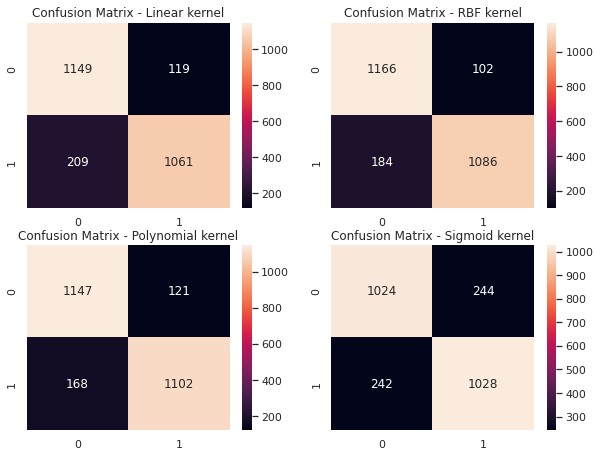

,Kernel,Accuracy
0,Linear,87.07644
1,RBF,88.73128
2,Polynomial,88.61308
3,Sigmoid,80.85106


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
cm_poly = confusion_matrix(y_test, y_pred_poly)
cm_sig = confusion_matrix(y_test, y_pred_sig)


fig, ax = plt.subplots(2,2)
ax1 = sn.heatmap(cm_linear, annot = True, fmt = 'd', ax = ax[0, 0])
ax1.title.set_text('Confusion Matrix - Linear kernel')
ax2 = sn.heatmap(cm_rbf, annot = True, fmt = 'd', ax = ax[0, 1])
ax2.title.set_text('Confusion Matrix - RBF kernel')
ax3 = sn.heatmap(cm_poly, annot = True, fmt = 'd', ax = ax[1, 0])
ax3.title.set_text('Confusion Matrix - Polynomial kernel')
ax4 = sn.heatmap(cm_sig, annot = True, fmt = 'd', ax = ax[1, 1])
ax4.title.set_text('Confusion Matrix - Sigmoid kernel')
plt.show()

#print('Accuracy through linear kernel:', round(accuracy_score(y_test, y_pred_linear)*100, 2), '%') 
#print('Accuracy through rbf kernel:', round(accuracy_score(y_test, y_pred_rbf)*100, 2), '%')
#print('Accuracy through polynomial kernel:', round(accuracy_score(y_test, y_pred_poly)*100, 2), '%')
#print('Accuracy through sigmoid kernel:', round(accuracy_score(y_test, y_pred_sig)*100, 2), '%')

accuracy_table = pd.DataFrame({'Kernel':['Linear', 'RBF', 'Polynomial', 'Sigmoid'], 
                              'Accuracy':[round(accuracy_score(y_test, y_pred_linear)*100, 5), 
                                           round(accuracy_score(y_test, y_pred_rbf)*100, 5), 
                                           round(accuracy_score(y_test, y_pred_poly)*100, 5), 
                                           round(accuracy_score(y_test, y_pred_sig)*100, 5)]})
accuracy_table

In [15]:
#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score

#for Linear Kernel
accuracies_linear = cross_val_score(estimator = classifier_linear, X = x_train, y = y_train, cv = 10)
print("Accuracy in Linear Kernel: {:.2f} %".format(accuracies_linear.mean()*100))
print("Standard Deviation in Linear Kernel: {:.2f} %".format(accuracies_linear.std()*100))

#for RBF Kernel
accuracies_rbf = cross_val_score(estimator = classifier_rbf, X = x_train, y = y_train, cv = 10)
print("Accuracy in RBF Kernel: {:.2f} %".format(accuracies_rbf.mean()*100))
print("Standard Deviation in RBF Kernel: {:.2f} %".format(accuracies_rbf.std()*100))

#for Polynomial Kernel
accuracies_poly = cross_val_score(estimator = classifier_poly, X = x_train, y = y_train, cv = 10)
print("Accuracy in Polynomial Kernel: {:.2f} %".format(accuracies_poly.mean()*100))
print("Standard Deviation in Polynomial Kernel: {:.2f} %".format(accuracies_poly.std()*100))

#for Sigmoid Kernel
accuracies_sig = cross_val_score(estimator = classifier_sig, X = x_train, y = y_train, cv = 10)
print("Accuracy in Sigmoid Kernel: {:.2f} %".format(accuracies_sig.mean()*100))
print("Standard Deviation in Sigmoid Kernel: {:.2f} %".format(accuracies_sig.std()*100))

accuracy_table_kfold = pd.DataFrame({'Kernel':['Linear', 'RBF', 'Polynomial', 'Sigmoid'], 
                              'Accuracy':[round(accuracies_linear.mean()*100, 5), 
                                           round(accuracies_rbf.mean()*100, 5),
                                           round(accuracies_poly.mean()*100, 5),
                                           round(accuracies_sig.mean()*100, 5)],
                               'Standard Deviation':[round(accuracies_linear.std()*100, 5), 
                                                     round(accuracies_rbf.std()*100, 5),
                                                     round(accuracies_poly.std()*100, 5),
                                                     round(accuracies_sig.std()*100, 5)]})
accuracy_table_kfold

Accuracy in Linear Kernel: 86.73 %
Standard Deviation in Linear Kernel: 1.39 %
Accuracy in RBF Kernel: 88.47 %
Standard Deviation in RBF Kernel: 1.40 %
Accuracy in Polynomial Kernel: 87.93 %
Standard Deviation in Polynomial Kernel: 1.26 %
Accuracy in Sigmoid Kernel: 79.80 %
Standard Deviation in Sigmoid Kernel: 1.89 %


,Kernel,Accuracy,Standard Deviation
0,Linear,86.72725,1.39317
1,RBF,88.46691,1.39937
2,Polynomial,87.92637,1.25788
3,Sigmoid,79.80362,1.89442


In [16]:
#Applying Grid Search to find the best model and the best parameters
classifier = SVC()
from sklearn.model_selection import GridSearchCV
parameters = [{'kernel': ['linear']},
              {'C':[0.25, 0.5, 0.75], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
              {'kernel': ['poly'], 'degree': [1, 2, 3, 4, 5, 6]}, 
              {'kernel': ['sigmoid']}]
grid_search_train = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1, verbose = 3)
grid_search_train.fit(x_train, y_train)
best_accuracy_train = grid_search_train.best_score_
best_parameters_train = grid_search_train.best_params_
print("Best Accuracy for training set: {:.2f} %".format(best_accuracy_train*100))
print("Best Parameters for training set:", best_parameters_train)

Fitting 10 folds for each of 35 candidates, totalling 350 fits
Best Accuracy for training set: 90.70 %
Best Parameters for training set: {'C': 0.75, 'gamma': 0.9, 'kernel': 'rbf'}


In [17]:
y_pred_grid_search_train = grid_search_train.predict(x_test)
accuracy_score(y_test, y_pred_grid_search_train)

0.9066193853427896

In [18]:
grid_search_test = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1, verbose = 3)
grid_search_test.fit(x_test, y_test)
best_accuracy_test = grid_search_test.best_score_
best_parameters_test = grid_search_test.best_params_
print("Best Accuracy for test set: {:.2f} %".format(best_accuracy_test*100))
print("Best Parameters for test set:", best_parameters_test)

Fitting 10 folds for each of 35 candidates, totalling 350 fits
Best Accuracy for test set: 88.26 %
Best Parameters for test set: {'C': 0.75, 'gamma': 0.6, 'kernel': 'rbf'}


In [19]:
cv_results_train = pd.DataFrame({'Paramaters combinations':grid_search_train.cv_results_['params'], 
                           'Mean Accuracy':grid_search_train.cv_results_['mean_test_score'],
                           'Mean of time taken during different splits':grid_search_train.cv_results_['mean_score_time']})
cv_results_train['Error rate'] = [1-x for x in grid_search_train.cv_results_['mean_test_score']]

In [20]:
cv_results_test = pd.DataFrame({'Paramaters combinations':grid_search_test.cv_results_['params'], 
                           'Mean Accuracy':grid_search_test.cv_results_['mean_test_score'],
                           'Mean of time taken during different splits':grid_search_test.cv_results_['mean_score_time']})
cv_results_test['Error rate'] = [1-x for x in grid_search_test.cv_results_['mean_test_score']]

In [21]:
cv_results_test['Paramaters combinations']

0                           {'kernel': 'linear'}
1     {'C': 0.25, 'gamma': 0.1, 'kernel': 'rbf'}
2     {'C': 0.25, 'gamma': 0.2, 'kernel': 'rbf'}
3     {'C': 0.25, 'gamma': 0.3, 'kernel': 'rbf'}
4     {'C': 0.25, 'gamma': 0.4, 'kernel': 'rbf'}
5     {'C': 0.25, 'gamma': 0.5, 'kernel': 'rbf'}
6     {'C': 0.25, 'gamma': 0.6, 'kernel': 'rbf'}
7     {'C': 0.25, 'gamma': 0.7, 'kernel': 'rbf'}
8     {'C': 0.25, 'gamma': 0.8, 'kernel': 'rbf'}
9     {'C': 0.25, 'gamma': 0.9, 'kernel': 'rbf'}
10     {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
11     {'C': 0.5, 'gamma': 0.2, 'kernel': 'rbf'}
12     {'C': 0.5, 'gamma': 0.3, 'kernel': 'rbf'}
13     {'C': 0.5, 'gamma': 0.4, 'kernel': 'rbf'}
14     {'C': 0.5, 'gamma': 0.5, 'kernel': 'rbf'}
15     {'C': 0.5, 'gamma': 0.6, 'kernel': 'rbf'}
16     {'C': 0.5, 'gamma': 0.7, 'kernel': 'rbf'}
17     {'C': 0.5, 'gamma': 0.8, 'kernel': 'rbf'}
18     {'C': 0.5, 'gamma': 0.9, 'kernel': 'rbf'}
19    {'C': 0.75, 'gamma': 0.1, 'kernel': 'rbf'}
20    {'C': 0.75, 'g

In [22]:
gamma_train = []
for i in range(len(cv_results_train)):
    if cv_results_train['Paramaters combinations'][i]['kernel'] == 'rbf':
      gamma_train.append(cv_results_train['Paramaters combinations'][i]['gamma'])
    else:
      gamma_train.append(0)

gamma_test = []
for i in range(len(cv_results_test)):
    if cv_results_test['Paramaters combinations'][i]['kernel'] == 'rbf':
      gamma_test.append(cv_results_test['Paramaters combinations'][i]['gamma'])
    else:
      gamma_test.append(0)

cv_results_test['gamma_test'] = gamma_test
cv_results_train['gamma_train'] = gamma_train

c_train = []
for i in range(len(cv_results_train)):
    if cv_results_train['Paramaters combinations'][i]['kernel'] == 'rbf':
      c_train.append(cv_results_train['Paramaters combinations'][i]['C'])
    else:
      c_train.append(0)

c_test = []
for i in range(len(cv_results_test)):
    if cv_results_test['Paramaters combinations'][i]['kernel'] == 'rbf':
      c_test.append(cv_results_test['Paramaters combinations'][i]['C'])
    else:
      c_test.append(0)

cv_results_test['c_test'] = c_test
cv_results_train['c_train'] = c_train

degree_train = []
for i in range(len(cv_results_train)):
    if cv_results_train['Paramaters combinations'][i]['kernel'] == 'poly':
      degree_train.append(cv_results_train['Paramaters combinations'][i]['degree'])
    else:
      degree_train.append(0)

degree_test = []
for i in range(len(cv_results_test)):
    if cv_results_test['Paramaters combinations'][i]['kernel'] == 'poly':
      degree_test.append(cv_results_test['Paramaters combinations'][i]['degree'])
    else:
      degree_test.append(0)

cv_results_test['degree_test'] = degree_test
cv_results_train['degree_train'] = degree_train

kernel_train = []
for i in range(len(cv_results_train)):
  kernel_train.append(cv_results_train['Paramaters combinations'][i]['kernel'])

kernel_test = []
for i in range(len(cv_results_test)):
  kernel_test.append(cv_results_test['Paramaters combinations'][i]['kernel'])

cv_results_test['kernel_test'] = kernel_test
cv_results_train['kernel_train'] = kernel_train

In [23]:
import random
def random_colours(number_of_colours):
  colours = []
  for i in range(number_of_colours):
    colours.append('#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
  return colours
colors = random_colours(8)

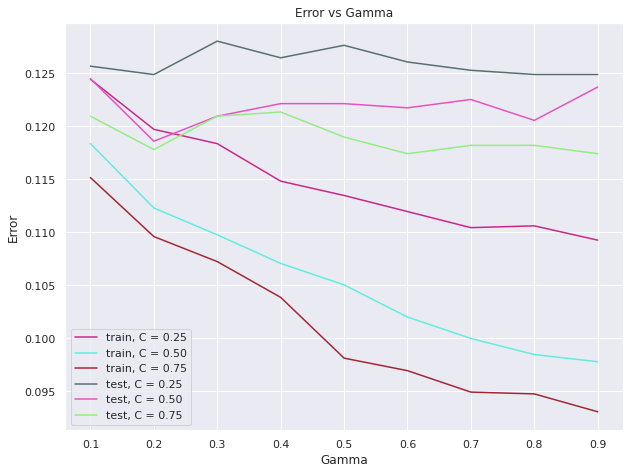

In [24]:
#plot for time taken for training & test sets vs error rates

plt.plot(cv_results_train[(cv_results_train['gamma_train'] != 0) & (cv_results_train['c_train'] == 0.25)]['gamma_train'], 
         cv_results_train[(cv_results_train['gamma_train'] != 0) & (cv_results_train['c_train'] == 0.25)]['Error rate'], 
         color = colors[0], label = 'train, C = 0.25')
plt.plot(cv_results_train[(cv_results_train['gamma_train'] != 0) & (cv_results_train['c_train'] == 0.5)]['gamma_train'], 
         cv_results_train[(cv_results_train['gamma_train'] != 0) & (cv_results_train['c_train'] == 0.5)]['Error rate'], 
         color = colors[1], label = 'train, C = 0.50')
plt.plot(cv_results_train[(cv_results_train['gamma_train'] != 0) & (cv_results_train['c_train'] == 0.75)]['gamma_train'], 
         cv_results_train[(cv_results_train['gamma_train'] != 0) & (cv_results_train['c_train'] == 0.75)]['Error rate'], 
         color = colors[2], label = 'train, C = 0.75')
plt.plot(cv_results_test[(cv_results_test['gamma_test'] != 0) & (cv_results_test['c_test'] == 0.25)]['gamma_test'], 
         cv_results_test[(cv_results_test['gamma_test'] != 0) & (cv_results_test['c_test'] == 0.25)]['Error rate'], 
         color = colors[3], label = 'test, C = 0.25')
plt.plot(cv_results_test[(cv_results_test['gamma_test'] != 0) & (cv_results_test['c_test'] == 0.5)]['gamma_test'], 
         cv_results_test[(cv_results_test['gamma_test'] != 0) & (cv_results_test['c_test'] == 0.5)]['Error rate'], 
         color = colors[4], label = 'test, C = 0.50')
plt.plot(cv_results_test[(cv_results_test['gamma_test'] != 0) & (cv_results_test['c_test'] == 0.75)]['gamma_test'], 
         cv_results_test[(cv_results_test['gamma_test'] != 0) & (cv_results_test['c_test'] == 0.75)]['Error rate'], 
         color = colors[5], label = 'test, C = 0.75')

plt.xlabel('Gamma')
plt.ylabel('Error')
plt.title('Error vs Gamma')
plt.legend()

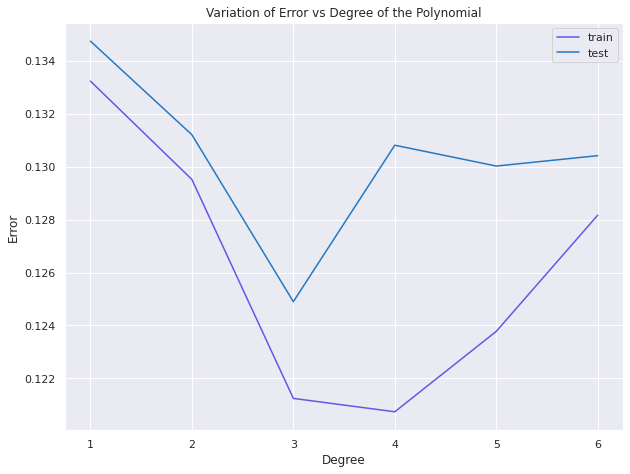

In [25]:
#learning curve - Error rate vs degree of the model

plt.plot(cv_results_train[cv_results_train['degree_train'] != 0]['degree_train'], 
         cv_results_train[cv_results_train['degree_train'] != 0]['Error rate'], 
         color = colors[7], label = 'train')
plt.plot(cv_results_test[cv_results_test['degree_test'] != 0]['degree_test'], 
         cv_results_test[cv_results_test['degree_test'] != 0]['Error rate'], 
         color = colors[6], label = 'test')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.title('Variation of Error vs Degree of the Polynomial')
plt.legend()

[learning_curve] Training set sizes: [ 532 1065 1598 2131 2664 3197 3730 4263 4796 5329]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of 100 | elapsed:    4.4s remaining:   21.5s
[Parallel(n_jobs=-1)]: Done  38 out of 100 | elapsed:   11.4s remaining:   18.5s
[Parallel(n_jobs=-1)]: Done  59 out of 100 | elapsed:   18.0s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done  80 out of 100 | elapsed:   24.1s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   30.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[learning_curve] Training set sizes: [ 532 1065 1598 2131 2664 3197 3730 4263 4796 5329]


[Parallel(n_jobs=-1)]: Done  17 out of 100 | elapsed:    6.7s remaining:   32.9s
[Parallel(n_jobs=-1)]: Done  38 out of 100 | elapsed:   17.1s remaining:   27.9s
[Parallel(n_jobs=-1)]: Done  59 out of 100 | elapsed:   27.1s remaining:   18.8s
[Parallel(n_jobs=-1)]: Done  80 out of 100 | elapsed:   36.2s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   46.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[learning_curve] Training set sizes: [ 532 1065 1598 2131 2664 3197 3730 4263 4796 5329]


[Parallel(n_jobs=-1)]: Done  17 out of 100 | elapsed:    5.1s remaining:   24.8s
[Parallel(n_jobs=-1)]: Done  38 out of 100 | elapsed:   12.9s remaining:   21.0s
[Parallel(n_jobs=-1)]: Done  59 out of 100 | elapsed:   20.3s remaining:   14.1s
[Parallel(n_jobs=-1)]: Done  80 out of 100 | elapsed:   27.3s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   35.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[learning_curve] Training set sizes: [ 532 1065 1598 2131 2664 3197 3730 4263 4796 5329]


[Parallel(n_jobs=-1)]: Done  17 out of 100 | elapsed:    7.3s remaining:   35.5s
[Parallel(n_jobs=-1)]: Done  38 out of 100 | elapsed:   16.3s remaining:   26.5s
[Parallel(n_jobs=-1)]: Done  80 out of 100 | elapsed:   31.1s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   39.5s finished


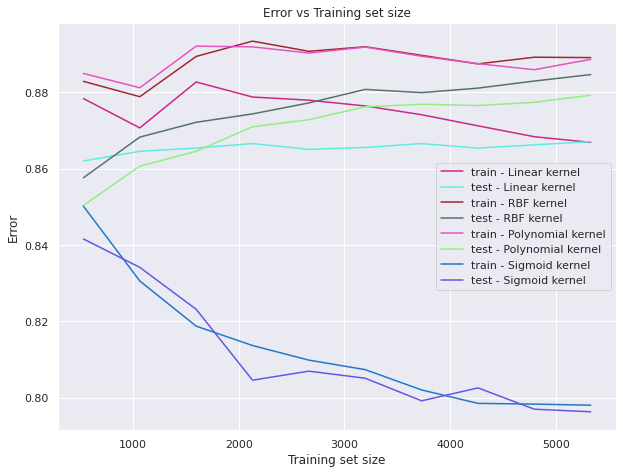

<Figure size 720x540 with 0 Axes>

In [26]:
from sklearn.model_selection import learning_curve
def plot_learning_curve():
  train_sizes_linear, train_scores_linear, test_scores_linear = learning_curve(classifier_linear, x_train, y_train, n_jobs = -1, cv = 10, 
                                                          train_sizes = np.linspace(0.1, 1.0, 10), verbose = 5)
  train_sizes_rbf, train_scores_rbf, test_scores_rbf = learning_curve(classifier_rbf, x_train, y_train, n_jobs = -1, cv = 10, 
                                                          train_sizes = np.linspace(0.1, 1.0, 10), verbose = 5)
  train_sizes_poly, train_scores_poly, test_scores_poly = learning_curve(classifier_poly, x_train, y_train, n_jobs = -1, cv = 10, 
                                                          train_sizes = np.linspace(0.1, 1.0, 10), verbose = 5)
  train_sizes_sig, train_scores_sig, test_scores_sig = learning_curve(classifier_sig, x_train, y_train, n_jobs = -1, cv = 10, 
                                                          train_sizes = np.linspace(0.1, 1.0, 10), verbose = 5)
  train_scores_mean_linear = np.mean(train_scores_linear, axis=1)
  test_scores_mean_linear = np.mean(test_scores_linear, axis=1)
  train_scores_mean_rbf = np.mean(train_scores_rbf, axis=1)
  test_scores_mean_rbf = np.mean(test_scores_rbf, axis=1)
  train_scores_mean_poly = np.mean(train_scores_poly, axis=1)
  test_scores_mean_poly = np.mean(test_scores_poly, axis=1)
  train_scores_mean_sig = np.mean(train_scores_sig, axis=1)
  test_scores_mean_sig = np.mean(test_scores_sig, axis=1)

  plt.plot(train_sizes_linear, train_scores_mean_linear, color = colors[0], label = 'train - Linear kernel')
  plt.plot(train_sizes_linear, test_scores_mean_linear, color = colors[1], label = 'test - Linear kernel')

  plt.plot(train_sizes_rbf, train_scores_mean_rbf, color = colors[2], label = 'train - RBF kernel')
  plt.plot(train_sizes_rbf, test_scores_mean_rbf, color = colors[3], label = 'test - RBF kernel')

  plt.plot(train_sizes_poly, train_scores_mean_poly, color = colors[4], label = 'train - Polynomial kernel')
  plt.plot(train_sizes_poly, test_scores_mean_poly, color = colors[5], label = 'test - Polynomial kernel')
  
  plt.plot(train_sizes_sig, train_scores_mean_sig, color = colors[6], label = 'train - Sigmoid kernel')
  plt.plot(train_sizes_sig, test_scores_mean_sig, color = colors[7], label = 'test - Sigmoid kernel')
  plt.xlabel('Training set size')
  plt.ylabel('Error')
  plt.title('Error vs Training set size')
  plt.legend()
  plt.figure()
plot_learning_curve()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Error')

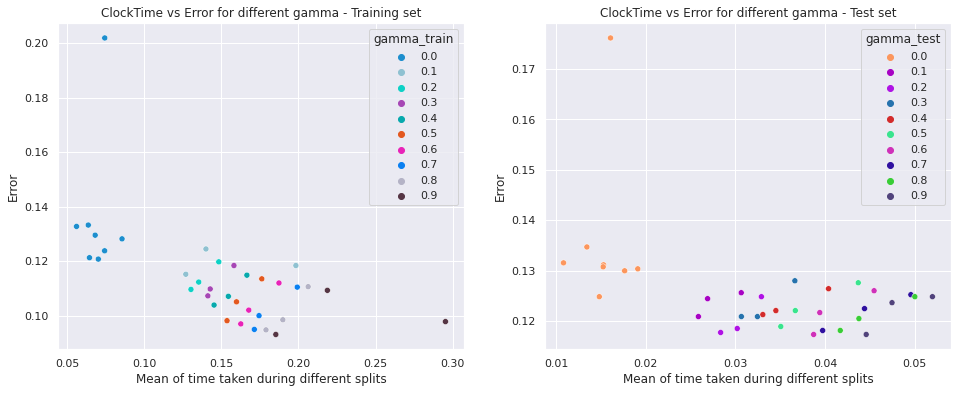

In [27]:
fig, ax = plt.subplots(1,2)
fig = plt.gcf()
fig.set_size_inches(16, 6)
ax1 = sn.scatterplot(cv_results_train['Mean of time taken during different splits'], cv_results_train['Error rate'], 
               hue = cv_results_train['gamma_train'], ax = ax[0], palette = random_colours(10))
ax1.title.set_text('ClockTime vs Error for different gamma - Training set')
ax1.set_ylabel('Error')
ax2 = sn.scatterplot(cv_results_test['Mean of time taken during different splits'], cv_results_test['Error rate'], 
               hue = cv_results_test['gamma_test'], ax = ax[1], palette = random_colours(10))
ax2.title.set_text('ClockTime vs Error for different gamma - Test set')
ax2.set_ylabel('Error')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Error')

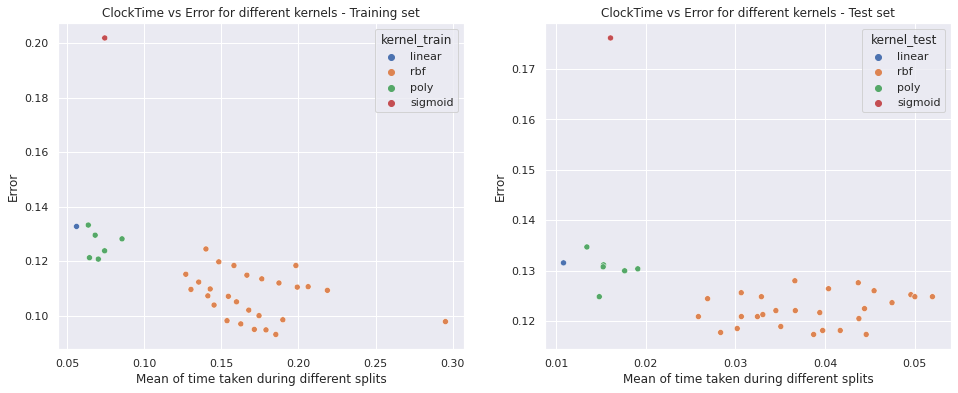

In [28]:
fig, ax = plt.subplots(1,2)
fig = plt.gcf()
fig.set_size_inches(16, 6)
hue_order = ['linear', 'rbf', 'poly', 'sigmoid']
ax1 = sn.scatterplot(cv_results_train['Mean of time taken during different splits'], cv_results_train['Error rate'], 
               hue = cv_results_train['kernel_train'], hue_order = hue_order, ax = ax[0])
ax1.title.set_text('ClockTime vs Error for different kernels - Training set')
ax1.set_ylabel('Error')
ax2 = sn.scatterplot(cv_results_test['Mean of time taken during different splits'], cv_results_test['Error rate'], 
               hue = cv_results_test['kernel_test'], hue_order = hue_order, ax = ax[1])
ax2.title.set_text('ClockTime vs Error for different kernels - Test set')
ax2.set_ylabel('Error')

Accuracy for fuls wily grown Decision Treeth Gini index as criterion: 0.9093774625689519


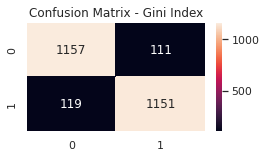

In [29]:
#Decision Trees without Pruning
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1123401)
classifier_dt.fit(x_train, y_train)

y_pred_dt = classifier_dt.predict(x_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)
fig = plt.figure()
fig = plt.gcf()
fig.set_size_inches(4, 2)
ax1 = sn.heatmap(cm_dt, annot = True, fmt = 'd')
ax1.title.set_text('Confusion Matrix - Gini Index')

print('Accuracy for fuls wily grown Decision Treeth Gini index as criterion:', accuracy_score(y_test, y_pred_dt))

In [30]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
data_dot = StringIO()
export_graphviz(classifier_dt, out_file = data_dot)
graph = pydotplus.graph_from_dot_data(data_dot.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

Accuracy score when Criterion is gini 90.94
Accuracy score when Criterion is entropy 90.43


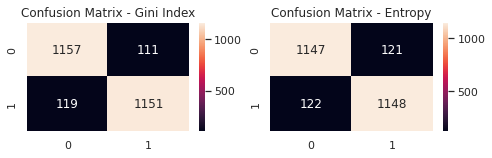

In [31]:
classifier_dt_gini = DecisionTreeClassifier(criterion='gini', random_state = 1123401)
classifier_dt_gini.fit(x_train, y_train)
y_pred_dt_gini = classifier_dt_gini.predict(x_test)

cm_dt_gini = confusion_matrix(y_test, y_pred_dt_gini)
print('Accuracy score when Criterion is gini', round(accuracy_score(y_test, y_pred_dt_gini)*100, 2))

classifier_dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state = 1123401)
classifier_dt_entropy.fit(x_train, y_train)
y_pred_dt_entropy = classifier_dt_entropy.predict(x_test)
cm_dt_entropy = confusion_matrix(y_test, y_pred_dt_entropy)
print('Accuracy score when Criterion is entropy', round(accuracy_score(y_test, y_pred_dt_entropy)*100, 2))

fig, ax = plt.subplots(1,2)
fig = plt.gcf()
fig.set_size_inches(8, 2)
ax1 = sn.heatmap(cm_dt_gini, annot = True, fmt = 'd', ax = ax[0])
ax1.title.set_text('Confusion Matrix - Gini Index')
ax2 = sn.heatmap(cm_dt_entropy, annot = True, fmt = 'd', ax = ax[1])
ax2.title.set_text('Confusion Matrix - Entropy')
plt.show()

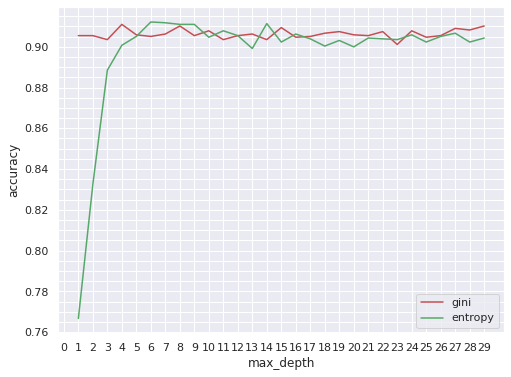

In [32]:
from matplotlib.ticker import MultipleLocator
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
  classifier_dt_gini = DecisionTreeClassifier(criterion='gini')
  classifier_dt_gini.fit(x_train, y_train)
  y_pred_dt_gini = classifier_dt_gini.predict(x_test)
  acc_gini.append(accuracy_score(y_test, y_pred_dt_gini))
  
  classifier_dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=i)
  classifier_dt_entropy.fit(x_train, y_train)
  y_pred_dt_entropy = classifier_dt_entropy.predict(x_test)
  acc_entropy.append(accuracy_score(y_test, y_pred_dt_entropy))

  max_depth.append(i)
  metrics_data = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 'acc_entropy':pd.Series(acc_entropy), 'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6))
plt.plot('max_depth','acc_gini', data = metrics_data, label='gini', color = 'r')
plt.plot('max_depth','acc_entropy', data = metrics_data, label='entropy', color = 'g')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(range(0, 30, 1))
spacing = 0.005 # This can be your user specified spacing. 
minorLocator = MultipleLocator(spacing)
ax.yaxis.set_minor_locator(minorLocator)
plt.grid(True, 'both')
plt.legend()

In [33]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth = 9, random_state = 1123401)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
accuracy_score(y_test, pred)

0.9168636721828212

In [34]:
#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score

#for Decision tree
accuracies_dt = cross_val_score(estimator = classifier_dt, X = x_train, y = y_train, cv = 10)
print("Accuracy in Decision Tree: {:.2f} %".format(accuracies_dt.mean()*100))
print("Standard Deviation for accruracy in Decision Tree: {:.2f} %".format(accuracies_dt.std()*100))

Accuracy in Decision Tree: 90.56 %
Standard Deviation for accruracy in Decision Tree: 1.70 %


[learning_curve] Training set sizes: [ 532 1065 1598 2131 2664 3197 3730 4263 4796 5329]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of 100 | elapsed:    0.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  38 out of 100 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  80 out of 100 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished


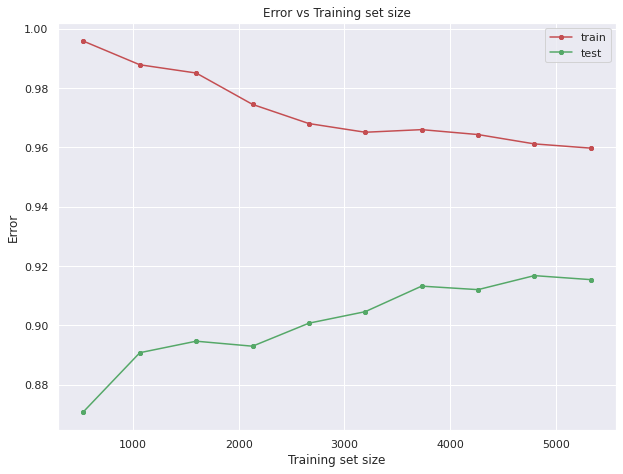

<Figure size 720x540 with 0 Axes>

In [35]:
def plot_learning_curve_dt():
  train_sizes_dt, train_scores_dt, test_scores_dt = learning_curve(dtree, x_train, y_train, n_jobs = -1, cv = 10, 
                                                          train_sizes = np.linspace(0.1, 1.0, 10), verbose = 5)
  
  train_scores_mean_dt = np.mean(train_scores_dt, axis=1)
  test_scores_mean_dt = np.mean(test_scores_dt, axis=1)
  plt.plot(train_sizes_dt, train_scores_mean_dt, color = 'r', label = 'train', marker = '8', markersize = 5)
  plt.plot(train_sizes_dt, test_scores_mean_dt, color = 'g', label = 'test', marker = '8', markersize = 5)
  plt.xlabel('Training set size')
  plt.ylabel('Error')
  plt.title('Error vs Training set size')
  plt.legend()
  plt.figure()
plot_learning_curve_dt()